# Requirment
Contributor: Pat Wu, Ethan Wu


In [17]:
%reset -f
import sys
print(sys.version)

3.7.4 (default, Aug  9 2019, 18:34:13) [MSC v.1915 64 bit (AMD64)]


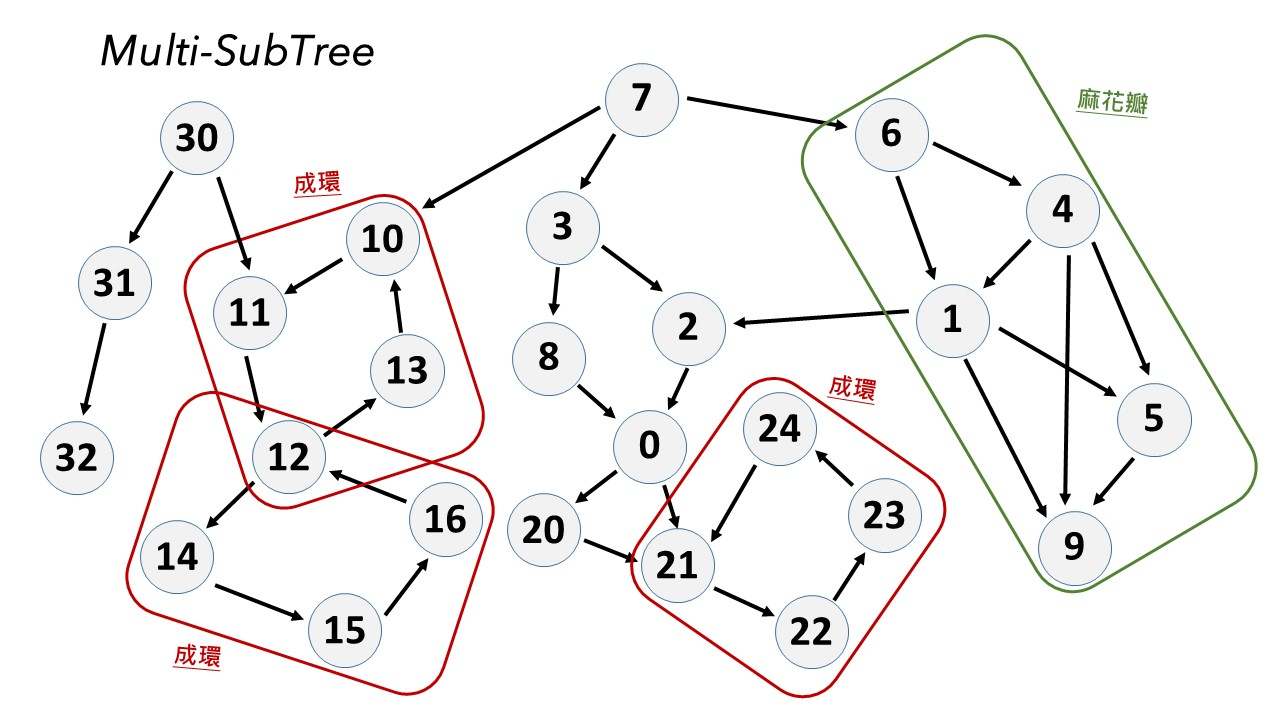

In [18]:
from IPython.display import Image
Image("Multi-SubTree.jpg")

# Graph pipeline
* 1.先檢查網路中是否有環, 把環內成員用代表號代替
* 2.用代表號拉圖 (Adjency List … )
* 3.尋找代表號圖中的 Dominator
* 4.Dominator [i] & Dominator [j]中間所包含的所有成員, 就是一個戶

In [19]:
import pandas as pd
import numpy as np

c1 = [7,10,11,12,12,13,14,15,16,7,7,3,3,8,2,0,0,20,21,22,23,24,6,6,4,4,1,1,1,4,5,30,30,31]
c2 = [10,11,12,13,14,10,15,16,12,3,6,8,2,0,0,20,21,21,22,23,24,21,4,1,1,5,5,2,9,9,9,11,31,32]

data_array = np.vstack((c1,c2)).T
del c1 ,c2

Adj_List = [[] for i in  range(data_array.max()+1)]#無向圖  
Adj_DList = [[] for i in  range(data_array.max()+1)]#有向圖
Adj_RDList = [[] for i in  range(data_array.max()+1)]#反向圖

#Prepare Graph data
for i,j in data_array:
    Adj_List[i].append(j)
    Adj_List[j].append(i)
    Adj_DList[i].append(j)
    Adj_RDList[j].append(i)

In [20]:
data_array

array([[ 7, 10],
       [10, 11],
       [11, 12],
       [12, 13],
       [12, 14],
       [13, 10],
       [14, 15],
       [15, 16],
       [16, 12],
       [ 7,  3],
       [ 7,  6],
       [ 3,  8],
       [ 3,  2],
       [ 8,  0],
       [ 2,  0],
       [ 0, 20],
       [ 0, 21],
       [20, 21],
       [21, 22],
       [22, 23],
       [23, 24],
       [24, 21],
       [ 6,  4],
       [ 6,  1],
       [ 4,  1],
       [ 4,  5],
       [ 1,  5],
       [ 1,  2],
       [ 1,  9],
       [ 4,  9],
       [ 5,  9],
       [30, 11],
       [30, 31],
       [31, 32]])

In [21]:
#CheckPoint: 
for i,x in enumerate(Adj_List):
    print('Member: ',i,' / 指向&被指向: ',x)

Member:  0  / 指向&被指向:  [8, 2, 20, 21]
Member:  1  / 指向&被指向:  [6, 4, 5, 2, 9]
Member:  2  / 指向&被指向:  [3, 0, 1]
Member:  3  / 指向&被指向:  [7, 8, 2]
Member:  4  / 指向&被指向:  [6, 1, 5, 9]
Member:  5  / 指向&被指向:  [4, 1, 9]
Member:  6  / 指向&被指向:  [7, 4, 1]
Member:  7  / 指向&被指向:  [10, 3, 6]
Member:  8  / 指向&被指向:  [3, 0]
Member:  9  / 指向&被指向:  [1, 4, 5]
Member:  10  / 指向&被指向:  [7, 11, 13]
Member:  11  / 指向&被指向:  [10, 12, 30]
Member:  12  / 指向&被指向:  [11, 13, 14, 16]
Member:  13  / 指向&被指向:  [12, 10]
Member:  14  / 指向&被指向:  [12, 15]
Member:  15  / 指向&被指向:  [14, 16]
Member:  16  / 指向&被指向:  [15, 12]
Member:  17  / 指向&被指向:  []
Member:  18  / 指向&被指向:  []
Member:  19  / 指向&被指向:  []
Member:  20  / 指向&被指向:  [0, 21]
Member:  21  / 指向&被指向:  [0, 20, 22, 24]
Member:  22  / 指向&被指向:  [21, 23]
Member:  23  / 指向&被指向:  [22, 24]
Member:  24  / 指向&被指向:  [23, 21]
Member:  25  / 指向&被指向:  []
Member:  26  / 指向&被指向:  []
Member:  27  / 指向&被指向:  []
Member:  28  / 指向&被指向:  []
Member:  29  / 指向&被指向:  []
Member:  30  / 指向&被指向:  [

In [22]:
#CheckPoint: 
for i,x in enumerate(Adj_DList):
    print('Member: ',i,' / 指向: ',x)

Member:  0  / 指向:  [20, 21]
Member:  1  / 指向:  [5, 2, 9]
Member:  2  / 指向:  [0]
Member:  3  / 指向:  [8, 2]
Member:  4  / 指向:  [1, 5, 9]
Member:  5  / 指向:  [9]
Member:  6  / 指向:  [4, 1]
Member:  7  / 指向:  [10, 3, 6]
Member:  8  / 指向:  [0]
Member:  9  / 指向:  []
Member:  10  / 指向:  [11]
Member:  11  / 指向:  [12]
Member:  12  / 指向:  [13, 14]
Member:  13  / 指向:  [10]
Member:  14  / 指向:  [15]
Member:  15  / 指向:  [16]
Member:  16  / 指向:  [12]
Member:  17  / 指向:  []
Member:  18  / 指向:  []
Member:  19  / 指向:  []
Member:  20  / 指向:  [21]
Member:  21  / 指向:  [22]
Member:  22  / 指向:  [23]
Member:  23  / 指向:  [24]
Member:  24  / 指向:  [21]
Member:  25  / 指向:  []
Member:  26  / 指向:  []
Member:  27  / 指向:  []
Member:  28  / 指向:  []
Member:  29  / 指向:  []
Member:  30  / 指向:  [11, 31]
Member:  31  / 指向:  [32]
Member:  32  / 指向:  []


In [23]:
#CheckPoint: 
for i,x in enumerate(Adj_RDList):
    print('Member: ',i,' / 被指向: ',x)

Member:  0  / 被指向:  [8, 2]
Member:  1  / 被指向:  [6, 4]
Member:  2  / 被指向:  [3, 1]
Member:  3  / 被指向:  [7]
Member:  4  / 被指向:  [6]
Member:  5  / 被指向:  [4, 1]
Member:  6  / 被指向:  [7]
Member:  7  / 被指向:  []
Member:  8  / 被指向:  [3]
Member:  9  / 被指向:  [1, 4, 5]
Member:  10  / 被指向:  [7, 13]
Member:  11  / 被指向:  [10, 30]
Member:  12  / 被指向:  [11, 16]
Member:  13  / 被指向:  [12]
Member:  14  / 被指向:  [12]
Member:  15  / 被指向:  [14]
Member:  16  / 被指向:  [15]
Member:  17  / 被指向:  []
Member:  18  / 被指向:  []
Member:  19  / 被指向:  []
Member:  20  / 被指向:  [0]
Member:  21  / 被指向:  [0, 20, 24]
Member:  22  / 被指向:  [21]
Member:  23  / 被指向:  [22]
Member:  24  / 被指向:  [23]
Member:  25  / 被指向:  []
Member:  26  / 被指向:  []
Member:  27  / 被指向:  []
Member:  28  / 被指向:  []
Member:  29  / 被指向:  []
Member:  30  / 被指向:  []
Member:  31  / 被指向:  [30]
Member:  32  / 被指向:  [31]


----
### SCC- 1 

In [24]:
#Initial
t=0
top=0
visit=np.zeros(data_array.max()+1,'i4')
visit_point=np.zeros(data_array.max()+1,'i4')

instack=np.zeros(data_array.max()+1,'i4')  #是否在堆裡
low=np.zeros(data_array.max()+1,'i4')      #i的代表號最小的遍歷時間(tmp)
contract=np.zeros(data_array.max()+1,'i4') #儲存代表號的array
stack=np.zeros(data_array.max()+1,'i4')    #存堆

def DFS_list_SCC(i,Adj_Dlist):
    if (visit[i]!=0):return;
    global t ; global top
    visit_point[t]=i
    t+=1
    visit[i] = low[i] =t
    
    #堆一次就+1
    stack[top] = i; instack[i] = True
    print('stack:[top]',i)
    top+=1
  
    for j in Adj_Dlist[i]:
        if visit[j]==0:
            DFS_list_SCC(j,Adj_Dlist)
        #如果j有在堆裡,把i的最低low改成i,j中最小的
        #Hint:如果成環, 必會指回環的開頭
        #把成員的low[i]改成組長的,
        #這樣成員就不會在if (visit[i] == low[i]):這段去尋找強連通 
        if instack[j]==True: 
            low[i] = min(low[i], low[j])
            print('instack cond',i)
            print('Now low[i]:',low[i],' (time)')
            print('----------')
    
    #當visit[i]跟low[i]一樣,把i當頭,尋找i以下的強連通        
    if (visit[i] == low[i]): 
        print('if (visit[i] == low[i]) COND','i:',i,'/visit[i]:',visit[i])
        j=0
        #把在堆裡的從最後往後拔 (Stack)
        while True:
            print("Now top:",top)
            top-=1
            print("Now top-1:",top)
            print("Now stack:",stack)
            j = stack[top]
            instack[j] = False
            contract[j] = i
            if i==j:
                print('---------')
                break

In [25]:
#遍歷所有點,把成環的圈在一起
for i in np.unique(data_array):
    if visit[i]==0: #如果i沒被遍歷過,就找他的SCC(更新contract) 
        DFS_list_SCC(i,Adj_DList);

stack:[top] 0
stack:[top] 20
stack:[top] 21
stack:[top] 22
stack:[top] 23
stack:[top] 24
instack cond 24
Now low[i]: 3  (time)
----------
instack cond 23
Now low[i]: 3  (time)
----------
instack cond 22
Now low[i]: 3  (time)
----------
instack cond 21
Now low[i]: 3  (time)
----------
if (visit[i] == low[i]) COND i: 21 /visit[i]: 3
Now top: 6
Now top-1: 5
Now stack: [ 0 20 21 22 23 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0]
Now top: 5
Now top-1: 4
Now stack: [ 0 20 21 22 23 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0]
Now top: 4
Now top-1: 3
Now stack: [ 0 20 21 22 23 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0]
Now top: 3
Now top-1: 2
Now stack: [ 0 20 21 22 23 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0]
---------
if (visit[i] == low[i]) COND i: 20 /visit[i]: 2
Now top: 2
Now top-1: 1
Now stack: [ 0 20 21 22 23 24  0  0  

得到contract(每個點的代表號:有成環就是用代表號代替,沒有的話就是用自己代替)

In [26]:
#CheckPoint: 看一下SCC的contract是否正確
for i,x in enumerate(contract):
    print('Member: ',i,' / Contract: ',x)
    
#思考14,15,16 頭可以是12

Member:  0  / Contract:  0
Member:  1  / Contract:  1
Member:  2  / Contract:  2
Member:  3  / Contract:  3
Member:  4  / Contract:  4
Member:  5  / Contract:  5
Member:  6  / Contract:  6
Member:  7  / Contract:  7
Member:  8  / Contract:  8
Member:  9  / Contract:  9
Member:  10  / Contract:  10
Member:  11  / Contract:  10
Member:  12  / Contract:  10
Member:  13  / Contract:  10
Member:  14  / Contract:  10
Member:  15  / Contract:  10
Member:  16  / Contract:  10
Member:  17  / Contract:  0
Member:  18  / Contract:  0
Member:  19  / Contract:  0
Member:  20  / Contract:  20
Member:  21  / Contract:  21
Member:  22  / Contract:  21
Member:  23  / Contract:  21
Member:  24  / Contract:  21
Member:  25  / Contract:  0
Member:  26  / Contract:  0
Member:  27  / Contract:  0
Member:  28  / Contract:  0
Member:  29  / Contract:  0
Member:  30  / Contract:  30
Member:  31  / Contract:  31
Member:  32  / Contract:  32


### SCC- 2 : 縮成團以後,把成環的成員存成 代表號:[成員] 的list格式
* 所以其實真的在做的時候, 是用代表號在拉圖, 拉完後再去map成員的list
* Input: np.unique(data_array):1D numpy.array


In [27]:
def SCC_set(Adj_Dlist,visit_member):
    Data_member_num = visit_member.max()+1
    SCC_Adj_list=[[] for i in range(Data_member_num)]
    SCC_Adj_Rlist=[[] for i in range(Data_member_num)]
    SCC=[[] for i in range(Data_member_num)]
    #用代表號拉圖
    for i in visit_member: #time complexity:O(n)
        for j in Adj_Dlist[i]: #以i當頭,看原圖指出去的點,contract是否一樣
            #如果j的代表號==i的(表示i,j為同一環)
            #此時就不紀錄在代表號圖的邊
            if contract[j]!=contract[i]:  
                SCC_Adj_list[contract[i]].append(contract[j])  #代表號出邊
                SCC_Adj_Rlist[contract[j]].append(contract[i]) #代表號入邊
    #代表號成員List(可改成Dictionary)
    for i in range(len(contract)):
       if contract[i]!=0:
           SCC[contract[i]].append(i)
    #Save
    globals()['SCC_Adj_list'] = SCC_Adj_list #代表號的Adjency list
    globals()['SCC_Adj_Rlist'] = SCC_Adj_Rlist #代表號的Adjency Reversed list
    globals()['SCC'] = SCC #代表號下的成員有誰

In [28]:
SCC_set(Adj_DList,np.unique(data_array))

這段做完後,就可以用SCC的Adj_list:SCC_Adj_list(代表號拉圖)

In [29]:
#CheckPoint: 看一下SCC後的代表號有向圖 SCC_Adj_list
#這個圖就變成有向無環圖了!
for i,x in enumerate(SCC_Adj_list):
    print('Member: ',i,' / Contract: ',x)

Member:  0  / Contract:  [20, 21]
Member:  1  / Contract:  [5, 2, 9]
Member:  2  / Contract:  [0]
Member:  3  / Contract:  [8, 2]
Member:  4  / Contract:  [1, 5, 9]
Member:  5  / Contract:  [9]
Member:  6  / Contract:  [4, 1]
Member:  7  / Contract:  [10, 3, 6]
Member:  8  / Contract:  [0]
Member:  9  / Contract:  []
Member:  10  / Contract:  []
Member:  11  / Contract:  []
Member:  12  / Contract:  []
Member:  13  / Contract:  []
Member:  14  / Contract:  []
Member:  15  / Contract:  []
Member:  16  / Contract:  []
Member:  17  / Contract:  []
Member:  18  / Contract:  []
Member:  19  / Contract:  []
Member:  20  / Contract:  [21]
Member:  21  / Contract:  []
Member:  22  / Contract:  []
Member:  23  / Contract:  []
Member:  24  / Contract:  []
Member:  25  / Contract:  []
Member:  26  / Contract:  []
Member:  27  / Contract:  []
Member:  28  / Contract:  []
Member:  29  / Contract:  []
Member:  30  / Contract:  [10, 31]
Member:  31  / Contract:  [32]
Member:  32  / Contract:  []


In [30]:
#CheckPoint: 比較一下SCC前的有向圖 Adj_DList
for i,x in enumerate(Adj_DList):
    print('Member: ',i,' / Contract: ',x)

Member:  0  / Contract:  [20, 21]
Member:  1  / Contract:  [5, 2, 9]
Member:  2  / Contract:  [0]
Member:  3  / Contract:  [8, 2]
Member:  4  / Contract:  [1, 5, 9]
Member:  5  / Contract:  [9]
Member:  6  / Contract:  [4, 1]
Member:  7  / Contract:  [10, 3, 6]
Member:  8  / Contract:  [0]
Member:  9  / Contract:  []
Member:  10  / Contract:  [11]
Member:  11  / Contract:  [12]
Member:  12  / Contract:  [13, 14]
Member:  13  / Contract:  [10]
Member:  14  / Contract:  [15]
Member:  15  / Contract:  [16]
Member:  16  / Contract:  [12]
Member:  17  / Contract:  []
Member:  18  / Contract:  []
Member:  19  / Contract:  []
Member:  20  / Contract:  [21]
Member:  21  / Contract:  [22]
Member:  22  / Contract:  [23]
Member:  23  / Contract:  [24]
Member:  24  / Contract:  [21]
Member:  25  / Contract:  []
Member:  26  / Contract:  []
Member:  27  / Contract:  []
Member:  28  / Contract:  []
Member:  29  / Contract:  []
Member:  30  / Contract:  [11, 31]
Member:  31  / Contract:  [32]
Member:

In [31]:
#CheckPoint: 看一下SCC內的成員
for i,x in enumerate(SCC):
    print('Head: ',i,' / Grouping Member: ',x)

Head:  0  / Grouping Member:  []
Head:  1  / Grouping Member:  [1]
Head:  2  / Grouping Member:  [2]
Head:  3  / Grouping Member:  [3]
Head:  4  / Grouping Member:  [4]
Head:  5  / Grouping Member:  [5]
Head:  6  / Grouping Member:  [6]
Head:  7  / Grouping Member:  [7]
Head:  8  / Grouping Member:  [8]
Head:  9  / Grouping Member:  [9]
Head:  10  / Grouping Member:  [10, 11, 12, 13, 14, 15, 16]
Head:  11  / Grouping Member:  []
Head:  12  / Grouping Member:  []
Head:  13  / Grouping Member:  []
Head:  14  / Grouping Member:  []
Head:  15  / Grouping Member:  []
Head:  16  / Grouping Member:  []
Head:  17  / Grouping Member:  []
Head:  18  / Grouping Member:  []
Head:  19  / Grouping Member:  []
Head:  20  / Grouping Member:  [20]
Head:  21  / Grouping Member:  [21, 22, 23, 24]
Head:  22  / Grouping Member:  []
Head:  23  / Grouping Member:  []
Head:  24  / Grouping Member:  []
Head:  25  / Grouping Member:  []
Head:  26  / Grouping Member:  []
Head:  27  / Grouping Member:  []
Head:  

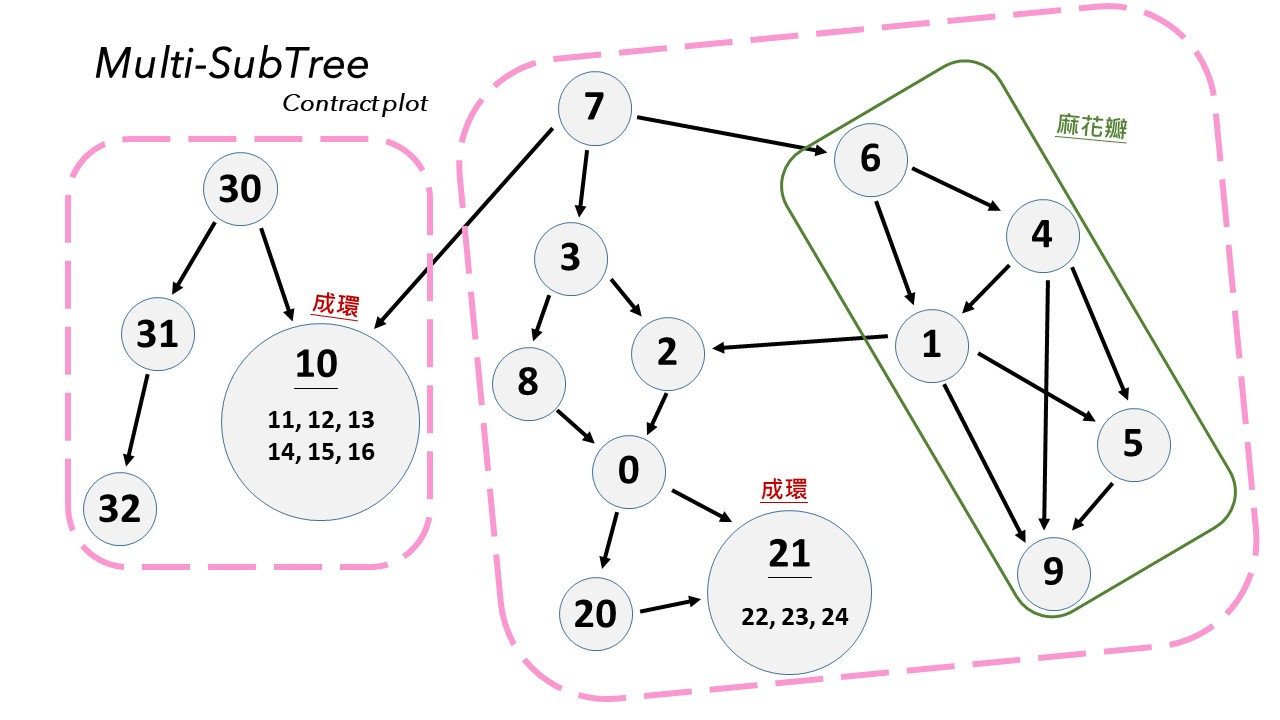

In [32]:
Image("Multi-SubTree_contract.jpg")

-------------

### Dominator: 找出代表號這張有向無環圖的所有支配點
* input:從沒有入邊的地方出

In [33]:
#Initial
t=0
visit=np.zeros(data_array.max()+1,'i4')         #遍歷in的時間
visit_point=np.zeros(data_array.max()+1,'i4')   #紀錄遍歷順序的array

#儲存區/ Init:自己
parent =np.zeros(data_array.max()+1,'i4')       #紀錄父節點:遍歷過程中上一層的點
p = np.zeros(data_array.max()+1,'i4')           #parent的tmp
sdom = np.zeros(data_array.max()+1,'i4')        #(tmp)入邊中能回朔到的最高點(最高的意思就是最早遍歷)->所以有可能是入邊(或是其他點的best)
best = np.zeros(data_array.max()+1,'i4')        #idom的tmp/用來存當前運算時的支配點
idom = np.zeros(data_array.max()+1,'i4')        #運算時:找i不如找idom[i](次低支配點)/最後儲存支配點的array

idom_T = np.zeros(data_array.max()+1,'i4')

for i in range(data_array.max()+1):
    parent[i] = p[i] = best[i] = sdom[i] = idom[i] = i;
revsdom=[[] for i in range(data_array.max()+1)] #組長紀錄成員的list,組長是成員入邊中所能找到的最高點

In [34]:
#Require Functions
def DFS_list(x,Adj):
    global t
    #bottom line:
    if (visit[x]!=0):return;
    
    #start
    print('Now DFS_list x: ',x)
    visit_point[t]=x
    t+=1      
    visit[x] = t
    for j in Adj[x]:
        if (visit[j]==0):
            DFS_list(j,Adj)
            parent[j] = x

def find(x):
    if (x==p[x]):
        return x
    y = find(p[x])
    #如果父節點best[p[x]]有入邊比best[x]早,
    #這樣以後找best[x]就不如找best[p[x]]好了(DP)
    if (visit[sdom[best[p[x]]]] < visit[sdom[best[x]]]):
        print('find更新:','把best[p[x]]:',best[p[x]],'->存到best[x]:',best[x])
        best[x] = best[p[x]]
    p[x] = y
    return p[x]

def DFS_list_Dominator(root,visit_member,Adj_list,Adj_Rlist):
    #尋找支配點,某點j的支配點定義為,若拔掉該支配點,則從root開始必走不到j這點
    #應用層面:拔掉支配點,家戶會破碎->支配點同時影響兩個家庭
    #Step 1:
    for k in range(t-1,0,-1):#根節點沒做
        i = visit_member[k];
        print('------------')
        print('New Stage:',i)
        #先看最早入邊有沒有比i早的,更新i的sdom
        for j in Adj_Rlist[i]:#check j指向i的有沒有更早的入邊(sdom)
            print('j:',j)
            if (visit[j]):
                find(j)
                #如果best[j]的入邊時間比i的最早入邊還早,就更新i的最早入邊呀
                if (visit[sdom[best[j]]] < visit[sdom[i]]):
                    sdom[i] = sdom[best[j]]#更新i的組長是誰
                    print('i:',i,' 更新最早入邊:',sdom[best[j]])
        revsdom[sdom[i]].append(i)#組長記錄組員;
        #在每一次i的迴圈中,會透過動態的調整best並即時確認best
        print('i入邊最早的成員有:','Lead(sdom[i]):',sdom[i],
              '/Members(revsdom[sdom[i]]):',revsdom[sdom[i]],'New In:',i)
        #把當前i當子樹頭，更新組員j們中idom
        #會有兩種情境:
        #第一種(if):如果j的best比i高,則先暫訂該j為i的idom(支配點)
        #第二種(else):如果組員j的best沒比組長i高,則該組員的idom(支配點)必是組長i
        for j in revsdom[i]:
            find(j) #透過find函數去更新best,p
            #如果組員j的best比我小,則j的支配點(idom[j])是best[j];反之就是我i
            if visit[sdom[best[j]]] < visit[i]:
                idom[j]=best[j]
            else:
                idom[j]=i
        #更新父節點
        for j in Adj_list[i]: #紀錄j的父節點p 
            if (parent[j] == i):
                p[j] = i;
    #Step 2:
    #只補做根節點=root這一個點,根節點可能是某個開頭,並不是全域最早
    for j in revsdom[root]:
        find(j)
        if visit[sdom[best[j]]] < visit[root]:
            idom[j]=best[j]
        else:
            idom[j]=root
    #Step 3:
    # 時刻從小到大，依序完成idom[best[j]]
    print('---------------------------------------','\n'
          'Step 3:時刻從小到大，依序完成idom的遞推更新')
    for k in range(t):
        i = visit_member[k];
        print('i:',i,'idom[i]:',idom[i],'sdom[i]:',sdom[i])
        if idom[i] != sdom[i]: 
            #當i的idom(次低支配點)不等於i的sdom(入邊能回朔到的最高點)
            idom[i] = idom[idom[i]] #把頭的idom一步一步往下傳給各個成員
    #Step 4:
    #(補做)
    #歸戶需要,支配點中,出邊必須兩條以上才被認為是支配點    
    for i in np.unique(idom):
        if len(Adj_List[idom[i]])>1:
            idom_T[i]=1
    #Step5:
    #(補做在樹末梢, 但其實是某個原圖環的支配點)
    #因為是遍歷代表號的圖,所以如果代表號在原圖下面有人,但是他卻是代表號有向無環圖(DAG)的最後一個點,這樣他不會被算成支配點
    #遍歷當前是0的代表號,檢查在原圖有沒有指向其他人,有的話其實他是支配點,
    #補的條件:在SCC_Adj_list中沒有指出去的成員 & 在 Adj_DList有指出去的成員
    for j in np.unique(visit_member):#原本想說用contract比較好,但其實用子樹角度去看應該會更一致
        if SCC_Adj_list[j] == []:    #在SCC_Adj_list中沒有指出去的成員
            if Adj_DList[j] != []:   #在 Adj_DList有指出去的成員
                idom_T[j]=1
                print('-------------')
                print('補做的idom:',j)
                print('SCC_Adj_list:',SCC_Adj_list[j])
                print('Adj_DList:',Adj_DList[j])


#每次遍歷完要initial這棵子樹的成員,要把在當前子樹遍歷過的成員參數初始化,讓下一顆子樹可以再使用這些成員
#其實Dominator只要存idom_T而已 
def DFS_list_Dominator_initsub(visit_member):
    global t; global visit; global visit_point;global parent ;
    global p; global best; global sdom; global idom;
    global revsdom;
    print('visit_member: ',visit_member)
    t=0
    for i in visit_member:
        visit[i]=0   #DFS
        visit_point[i]=0
        parent[i] = p[i] = best[i] = sdom[i] = idom[i] = i;
        revsdom[i]=[]  #vector<int> revsdom[9];  
    print('---------------SubTree End---------------\n')

In [35]:
# 有向無環圖所有起始點
# if len(SCC[i])>0 (找有指出去)
# and len(SCC_Adj_Rlist[i])==0 (沒有入編的當開頭)
DAG_point = [i for i in np.unique(data_array) if len(SCC[i])>0 and len(SCC_Adj_Rlist[i])==0]

In [36]:
print("有向無環圖(代表號)入邊所有起始點: ",DAG_point)

有向無環圖(代表號)入邊所有起始點:  [7, 30]


In [37]:
for i in DAG_point:
    DFS_list(i,SCC_Adj_list) #每個開頭都做一顆子樹
    visit_member= visit_point[0:t]#記錄子樹成員
    DFS_list_Dominator(i,visit_member,SCC_Adj_list,SCC_Adj_Rlist)
    DFS_list_Dominator_initsub(visit_member) 
    #將子樹成員的資料initial 
    #但這樣會把visit_member已經做過的再initial一次(idom可能是原本的,會被蓋掉=只留最後一次遍歷的)
    #蓋掉沒差,globals是否為支配點(idom_T), 其他對整個Pipeline來說都是tmp

Now DFS_list x:  7
Now DFS_list x:  10
Now DFS_list x:  3
Now DFS_list x:  8
Now DFS_list x:  0
Now DFS_list x:  20
Now DFS_list x:  21
Now DFS_list x:  2
Now DFS_list x:  6
Now DFS_list x:  4
Now DFS_list x:  1
Now DFS_list x:  5
Now DFS_list x:  9
------------
New Stage: 9
j: 1
i: 9  更新最早入邊: 1
j: 4
i: 9  更新最早入邊: 4
j: 5
i入邊最早的成員有: Lead(sdom[i]): 4 /Members(revsdom[sdom[i]]): [9] New In: 9
------------
New Stage: 5
j: 1
i: 5  更新最早入邊: 1
j: 4
i: 5  更新最早入邊: 4
i入邊最早的成員有: Lead(sdom[i]): 4 /Members(revsdom[sdom[i]]): [9, 5] New In: 5
------------
New Stage: 1
j: 4
i: 1  更新最早入邊: 4
j: 6
i: 1  更新最早入邊: 6
i入邊最早的成員有: Lead(sdom[i]): 6 /Members(revsdom[sdom[i]]): [1] New In: 1
------------
New Stage: 4
j: 6
i: 4  更新最早入邊: 6
i入邊最早的成員有: Lead(sdom[i]): 6 /Members(revsdom[sdom[i]]): [1, 4] New In: 4
find更新: 把best[p[x]]: 1 ->存到best[x]: 5
find更新: 把best[p[x]]: 1 ->存到best[x]: 9
------------
New Stage: 6
j: 7
i: 6  更新最早入邊: 7
i入邊最早的成員有: Lead(sdom[i]): 7 /Members(revsdom[sdom[i]]): [6] New In: 6
------------
Ne

In [38]:
for idx,idom in enumerate(idom_T):
    print('Member:',idx,' / Dominator: ',idom)
#4,5,9

Member: 0  / Dominator:  1
Member: 1  / Dominator:  0
Member: 2  / Dominator:  0
Member: 3  / Dominator:  1
Member: 4  / Dominator:  1
Member: 5  / Dominator:  1
Member: 6  / Dominator:  1
Member: 7  / Dominator:  1
Member: 8  / Dominator:  0
Member: 9  / Dominator:  1
Member: 10  / Dominator:  1
Member: 11  / Dominator:  1
Member: 12  / Dominator:  1
Member: 13  / Dominator:  1
Member: 14  / Dominator:  1
Member: 15  / Dominator:  1
Member: 16  / Dominator:  1
Member: 17  / Dominator:  0
Member: 18  / Dominator:  0
Member: 19  / Dominator:  0
Member: 20  / Dominator:  1
Member: 21  / Dominator:  1
Member: 22  / Dominator:  1
Member: 23  / Dominator:  1
Member: 24  / Dominator:  1
Member: 25  / Dominator:  0
Member: 26  / Dominator:  0
Member: 27  / Dominator:  0
Member: 28  / Dominator:  0
Member: 29  / Dominator:  0
Member: 30  / Dominator:  1
Member: 31  / Dominator:  1
Member: 32  / Dominator:  0


---------------------------------------
### Recap: 現在保存的重要物件:
* DAG_point:是否是子樹開頭
* SCC:代表號下的所屬成員(包括自己)
* idom_T:是否是支配點

所以其他物件其實都可以初始化

In [39]:
print('DAG_point:是否是子樹開頭 ->',DAG_point)
print('SCC:代表號下的所屬成員(包括自己) ->',SCC)
print('idom_T:是否是支配點 ->',idom_T)

DAG_point:是否是子樹開頭 -> [7, 30]
SCC:代表號下的所屬成員(包括自己) -> [[], [1], [2], [3], [4], [5], [6], [7], [8], [9], [10, 11, 12, 13, 14, 15, 16], [], [], [], [], [], [], [], [], [], [20], [21, 22, 23, 24], [], [], [], [], [], [], [], [], [30], [31], [32]]
idom_T:是否是支配點 -> [1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 0 0 0 0 0 1 1 0]


In [40]:
list(np.where(idom_T==1)[0])

[0, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 20, 21, 22, 23, 24, 30, 31]

---------------------------------------
### 圈出所有支配點到支配點之間的成員, 形成一戶
* 從代表號中的圖,尋找是支配點的點,依次遍歷,圈出支配點到支配點之間的成員
* 預計存成list的格式

In [41]:
def DFS_list_Group(x,Adj,idom_T):
    if (visit[x]!=0):return;                        # 遍歷過的return
    
    global t
    visit_point[t]=x
    t+=1
    visit[x] = t
    
    if (idom_T[x]==1 and x!=visit_point[0]):return; # 碰到支配點return 
    
    for j in Adj[x]:
        if (visit[j]==0):
            DFS_list_Group(j,Adj,idom_T)

def DFS_list_Group_initsub(): #tmp_initial
    #call global variable
    global visit; global visit_point ;global t
    t=0
    visit=np.zeros(data_array.max()+1,'i4')         # 遍歷in的時間
    visit_point=np.zeros(data_array.max()+1,'i4')   # 紀錄遍歷順序的array

In [42]:
#Initial
Group_point = [[] for i in range(data_array.max()+1)] #放戶的成員
DFS_list_Group_initsub()

In [43]:
for i in np.where(idom_T==1)[0]:          #遍歷所有代表號支配點
    #以i當頭,放入SCC的Dlist&支配點;尋找i指出去以下成員歸併成一戶
    DFS_list_Group(i,SCC_Adj_list,idom_T) #先遍歷,放SCC所以只會做代表號
    visit_member= visit_point[0:t]        #存成員(tmp)
    Group_point[i] = list(visit_member)   #是哪組的成員
    print('代表號:',i,' /成員:',Group_point[i])
    DFS_list_Group_initsub()              #tmp初始

代表號: 0  /成員: [0, 20, 21]
代表號: 3  /成員: [3, 8, 0, 2]
代表號: 4  /成員: [4, 1, 5, 2, 0, 9]
代表號: 5  /成員: [5, 9]
代表號: 6  /成員: [6, 4, 1, 5, 2, 0, 9]
代表號: 7  /成員: [7, 10, 3, 6]
代表號: 9  /成員: [9]
代表號: 10  /成員: [10]
代表號: 11  /成員: [11]
代表號: 12  /成員: [12]
代表號: 13  /成員: [13]
代表號: 14  /成員: [14]
代表號: 15  /成員: [15]
代表號: 16  /成員: [16]
代表號: 20  /成員: [20, 21]
代表號: 21  /成員: [21]
代表號: 22  /成員: [22]
代表號: 23  /成員: [23]
代表號: 24  /成員: [24]
代表號: 30  /成員: [30, 10, 31]
代表號: 31  /成員: [31, 32]


三種狀況:
1. 代表號: 沒成員 -> 他不是戶長也沒人
2. 代表號: 有成員但只有自己 -> 他是某環的其中一員(也是支配點)
3. 代表號: 有成員 -> 戶長也有帶人

In [44]:
#CheckPoint: 看一下SCC的contract是否正確
for i,x in enumerate(Group_point):
    print('代表號: ',i,' / 成員: ',x)

代表號:  0  / 成員:  [0, 20, 21]
代表號:  1  / 成員:  []
代表號:  2  / 成員:  []
代表號:  3  / 成員:  [3, 8, 0, 2]
代表號:  4  / 成員:  [4, 1, 5, 2, 0, 9]
代表號:  5  / 成員:  [5, 9]
代表號:  6  / 成員:  [6, 4, 1, 5, 2, 0, 9]
代表號:  7  / 成員:  [7, 10, 3, 6]
代表號:  8  / 成員:  []
代表號:  9  / 成員:  [9]
代表號:  10  / 成員:  [10]
代表號:  11  / 成員:  [11]
代表號:  12  / 成員:  [12]
代表號:  13  / 成員:  [13]
代表號:  14  / 成員:  [14]
代表號:  15  / 成員:  [15]
代表號:  16  / 成員:  [16]
代表號:  17  / 成員:  []
代表號:  18  / 成員:  []
代表號:  19  / 成員:  []
代表號:  20  / 成員:  [20, 21]
代表號:  21  / 成員:  [21]
代表號:  22  / 成員:  [22]
代表號:  23  / 成員:  [23]
代表號:  24  / 成員:  [24]
代表號:  25  / 成員:  []
代表號:  26  / 成員:  []
代表號:  27  / 成員:  []
代表號:  28  / 成員:  []
代表號:  29  / 成員:  []
代表號:  30  / 成員:  [30, 10, 31]
代表號:  31  / 成員:  [31, 32]
代表號:  32  / 成員:  []


### 整理成DataFrame

In [45]:
#把不在代表號的成員貼進去,並flatten
for i in range(len(Group_point)):
    if Group_point[i] != []:
        print('戶長: ',i)
        print('當前成員: ',SCC[i])
        #SCC的成員沒有在Group_point,就append進去
        for j in SCC[i]:
            if j not in Group_point[i]:
                Group_point[i].append(j)
                print(i,' Group_point add:',j)
        print('---------')

戶長:  0
當前成員:  []
---------
戶長:  3
當前成員:  [3]
---------
戶長:  4
當前成員:  [4]
---------
戶長:  5
當前成員:  [5]
---------
戶長:  6
當前成員:  [6]
---------
戶長:  7
當前成員:  [7]
---------
戶長:  9
當前成員:  [9]
---------
戶長:  10
當前成員:  [10, 11, 12, 13, 14, 15, 16]
10  Group_point add: 11
10  Group_point add: 12
10  Group_point add: 13
10  Group_point add: 14
10  Group_point add: 15
10  Group_point add: 16
---------
戶長:  11
當前成員:  []
---------
戶長:  12
當前成員:  []
---------
戶長:  13
當前成員:  []
---------
戶長:  14
當前成員:  []
---------
戶長:  15
當前成員:  []
---------
戶長:  16
當前成員:  []
---------
戶長:  20
當前成員:  [20]
---------
戶長:  21
當前成員:  [21, 22, 23, 24]
21  Group_point add: 22
21  Group_point add: 23
21  Group_point add: 24
---------
戶長:  22
當前成員:  []
---------
戶長:  23
當前成員:  []
---------
戶長:  24
當前成員:  []
---------
戶長:  30
當前成員:  [30]
---------
戶長:  31
當前成員:  [31]
---------


In [46]:
#Flatten成BP/戶長 format
BP=[]
Head=[]
for i in range(len(Group_point)):
    if len(Group_point[i])>1:
        Group_point_len = len(Group_point[i])
        BP.extend(Group_point[i])
        Head.extend(np.repeat(i,Group_point_len))

df_out = pd.DataFrame({'BP':BP,'Head':Head})        

In [47]:
df_out

,BP,Head
0,0,0
1,20,0
2,21,0
3,3,3
4,8,3
5,0,3
6,2,3
7,4,4
8,1,4
9,5,4


In [48]:
print('此圖的Dominator有: ',np.where(idom_T==1)[0])

此圖的Dominator有:  [ 0  3  4  5  6  7  9 10 11 12 13 14 15 16 20 21 22 23 24 30 31]


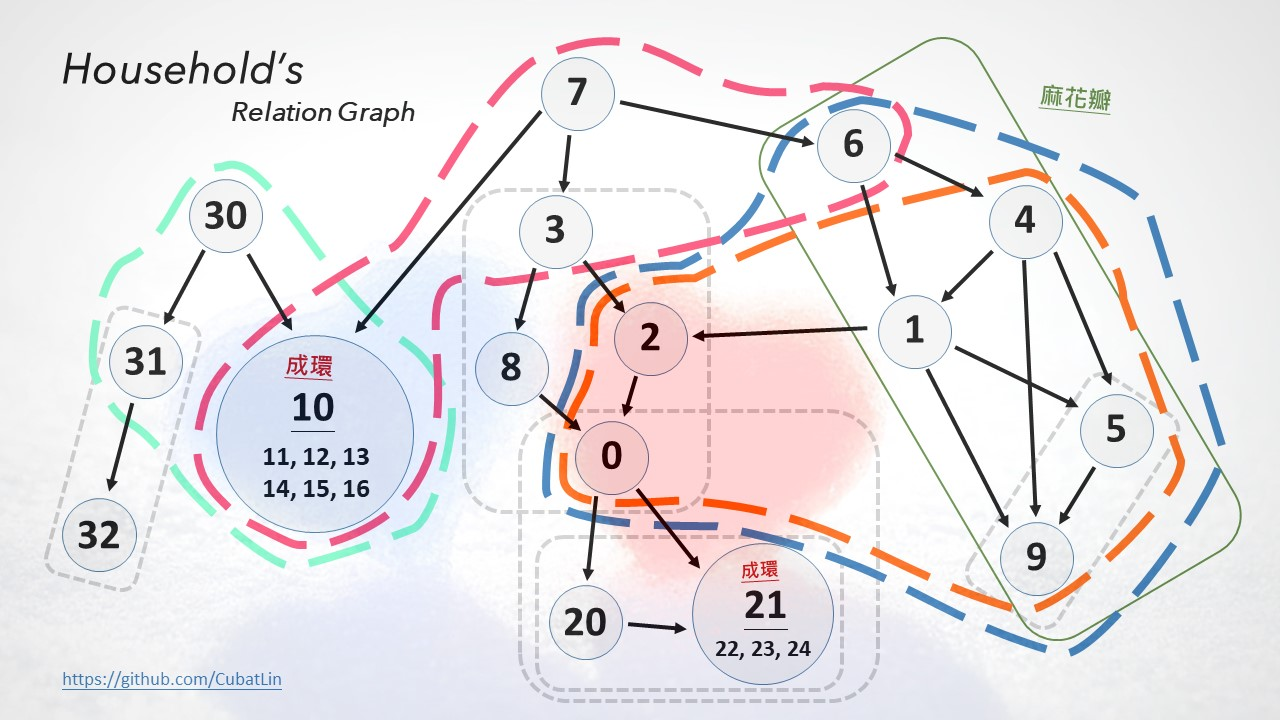

In [49]:
Image("Plot- HRG_final.jpg")

感謝您耐心閱讀這份來自未來文件 :)